# загрузка данных

In [5]:
import pandas as pd
df = pd.read_csv("C://Users//annal//aim//static//csv//Forbes_Billionaires.csv")
df

Rank                        Name  Networth  Age        Country  \
0         1                 Elon Musk      219.0   50  United States   
1         2                Jeff Bezos      171.0   58  United States   
2         3  Bernard Arnault & family      158.0   73         France   
3         4                Bill Gates      129.0   66  United States   
4         5            Warren Buffett      118.0   91  United States   
...     ...                        ...       ...  ...            ...   
2595   2578    Jorge Gallardo Ballart        1.0   80          Spain   
2596   2578              Nari Genomal        1.0   82    Philippines   
2597   2578            Ramesh Genomal        1.0   71    Philippines   
2598   2578            Sunder Genomal        1.0   68    Philippines   
2599   2578     Horst-Otto Gerberding        1.0   69        Germany   

                      Source                Industry  
0              Tesla, SpaceX             Automotive   
1                     Amazon             Technology   
2                       LVMH       Fashion & Retail   
3                  Microsoft             Technology   
4         Berkshire Hathaway  Finance & Investments   
...                      ...                     ...  
2595         pharmaceuticals             Healthcare   
2596                 apparel       Fashion & Retail   
2597                 apparel       Fashion & Retail   
2598                garments       Fashion & Retail   
2599  flavors and fragrances        Food & Beverage   

[2600 rows x 7 columns]

# входные и выходные переменные:
# входные: age и country
# выходные: networth

# создание лингвистических переменных

In [6]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
age_cat = ctrl.Antecedent(df["Age"].sort_values(), "age_cat")
networth = ctrl.Antecedent(df["Networth"].sort_values(), "networth")
rank = ctrl.Consequent(df["Rank "].sort_values(), "rank")

# формирование нечетких переменных для лингвистических переменных и их визуализация¶

c:\Users\annal\aim\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


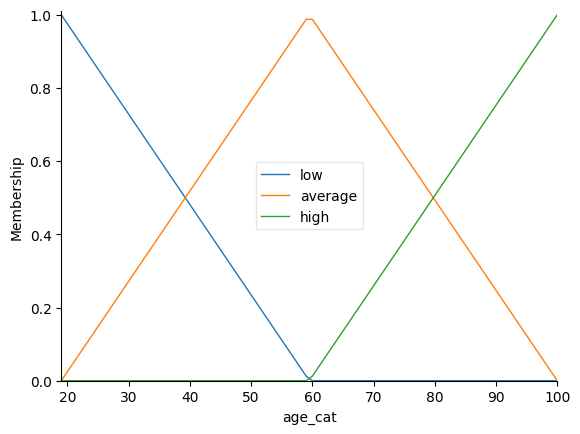

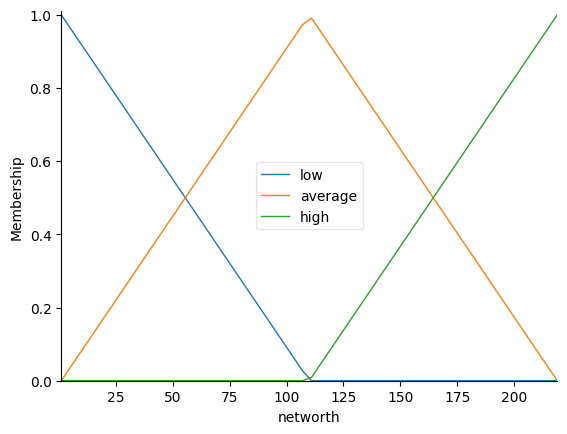

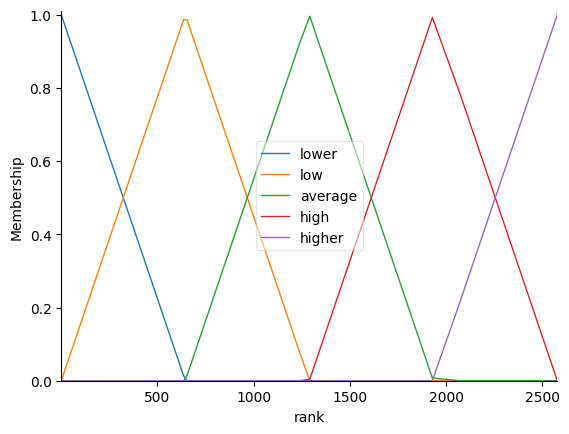

In [7]:
age_cat.automf(3, variable_type= "quant")
age_cat.view()
networth.automf(3, variable_type="quant")
networth.view()
rank.automf(5, variable_type="quant")
rank.view()

# формирование и визуализация нечётких правил

(<Figure size 640x480 with 1 Axes>, <Axes: >)

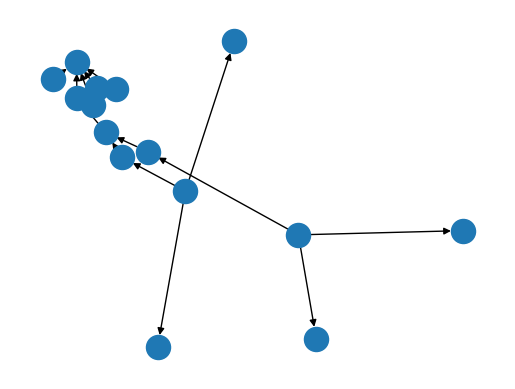

In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
rule1 = ctrl.Rule(age_cat['low'] & networth['low'], rank['lower'])
rule2 = ctrl.Rule(age_cat['low'] & networth['average'], rank['low'])
rule3 = ctrl.Rule(age_cat['low'] & networth['high'], rank['average'])
rule4 = ctrl.Rule(age_cat['average'] & networth['low'], rank['lower'])
rule5 = ctrl.Rule(age_cat['average'] & networth['average'], rank['average'])
rule6 = ctrl.Rule(age_cat['average'] & networth['high'], rank['high'])
rule7 = ctrl.Rule(age_cat['high'] & networth['low'], rank['average'])
rule8 = ctrl.Rule(age_cat['high'] & networth['average'], rank['high'])
rule9 = ctrl.Rule(age_cat['high'] & networth['high'], rank['higher'])

rule1.view()

# создание нечеткой системы и добавление нечетких правил в базу знаний нечеткой системы

In [19]:
rank_ctrl = ctrl.ControlSystem(
    [
        rule1,
        rule2,
        rule3,
        rule4,
        rule5,
        rule6,
        rule7,
        rule8,
        rule9,
    ]
)

ranks = ctrl.ControlSystemSimulation(rank_ctrl)

# пример расчёта rank на основе age_cat и networth

In [21]:
ranks.input['age_cat'] = 50
ranks.input['networth'] = 219
ranks.compute()
ranks.print_state()
print(ranks.output['rank'])

 Antecedents 
Antecedent: age_cat                 = 50
  - low                             : 0.2345679012345679
  - average                         : 0.7654320987654321
  - high                            : 0.0
Antecedent: networth                = 219
  - low                             : 0.0
  - average                         : 0.0
  - high                            : 1.0

 Rules 
RULE #0:
  IF age_cat[low] AND networth[low] THEN rank[higher]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - age_cat[low]                                           : 0.2345679012345679
  - networth[low]                                          : 0.0
                            age_cat[low] AND networth[low] = 0.0
  Activation (THEN-clause):
                                              rank[higher] : 0.0

RULE #1:
  IF age_cat[low] AND networth[average] THEN rank[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-c

# тестирование нечёткой системы

In [22]:
def fuzzy_pred(row):
    ranks.input['age_cat'] = row['Age']
    ranks.input['networth'] = row['Networth']
    ranks.compute()
    return ranks.output['rank']

res = df[['Age', 'Networth', 'Rank ']].head(100)

res['Pred'] = res.apply(fuzzy_pred, axis=1)

res.head(15)

Age  Networth  Rank          Pred
0    50     219.0      1   446.618638
1    58     171.0      2   948.540336
2    73     158.0      3   952.599948
3    66     129.0      4  1138.614099
4    91     118.0      5   814.043935
5    49     111.0      6  1473.194767
6    48     107.0      7  1498.674963
7    77     106.0      8  1040.193500
8    66      91.4      9  1309.303429
9    64      90.7     10  1344.732355
10   59      90.0     11  1435.386123
11   80      82.0     12  1200.124026
12   82      81.2     13  1185.800088
13   68      74.8     14  1370.702727
14   37      67.3     15  1689.837998

# оценка результатов (метрики для задачи регрессии)

In [23]:
import math
from sklearn import metrics


rmetrics = {}
rmetrics["RMSE"] = math.sqrt(metrics.mean_squared_error(res['Rank '], res['Pred']))
rmetrics["RMAE"] = math.sqrt(metrics.mean_absolute_error(res['Rank '], res['Pred']))
rmetrics["R2"] = metrics.r2_score(res['Rank '], res['Pred'])

rmetrics

{'RMSE': 1526.018176278599,
 'RMAE': 38.87544820606799,
 'R2': -2805.351442150934}

p.s. менять датасет нет смысла. все подобные датасеты имеют одинаковые колонки. какой не возьми, резульат не хороший